# 决策树
决策树(decision tree)是一种基本的分类与回归算法。在分类问题中，表示基于特征对样本进行分类的过程，可以认为它是一种**if-then**规则的集合。决策树模型的学习过程通常包括三个步骤：
- 特征选择
- 决策树的生成
- 决策树的修剪

## 1.模型定义
决策树模型是一种由**节点(node)** 和 **有向边(directed edge)** 组成的树形结构。其中节点有两种类型：
- **内部节点(internal node)：**表示某一个特征
- **叶节点(leaf node)：**表示某个类  
  
决策树进行分类的过程：从根节点开始，对样本的某一特征进行判断，根据判断结果将样本分配到子节点，然后如此递归的进行判断并分配，直至到达某一叶节点，则该样本属于该叶节点中的类。
> **每个样本从根节点到叶节点，有且只有一条路径。**  

![决策树模型](http://ss.csdn.net/p?http://mmbiz.qpic.cn/mmbiz_png/YJotEuBMe46kpkbMUnwibufql6UEGgSWHut2db23kwpUOeicu9nlHlahTqR1FnwR4DXw5vt1HqRCCSRMYQevxTzQ/0?wx_fmt=png)
上图是一个简单的决策树模型，根据某人“是否有房产”“是否结婚”以及“月收入”这三个特征，来判断能否偿还贷款。

## 2.特征选择
在生成决策树的过程中涉及到了递归选择**最优特征**的过程，这个过程至关重要，因为它直接决定了模型的生成效率和性能。  
  
怎样的特征才是最优的特征呢？  

直观上，当训练集被某个特征划分成子集后，使得各个子集中的样本**不确定性越小**，也就是说，使得各个子集中的样本类别越统一(最好的情况是所有样本属于同一类)，那么这个特征就是最优特征。  

在介绍如何选择最优特征之前，先来介绍两个重要的基本概念：熵和条件熵。

### 2.1 熵
在信息论和概率统计中，**熵(entropy)** 就是用来表示随机变量不确定性的指标。  
  
设$X$是一个离散随机变量，其概率分布为：$$P(X=x_{i})=p_{i},\quad i=1,2,...,n$$
则随机变量$X$的熵定义为：$$H(X)=-\sum_{i=1}^{n}p_{i}\log p_{i}$$ 
上式中的对数通常以2为底或以e为底，若$p_{i}=0$，则$0log0=0$。由定义可知，熵只与$X$的分布有关，所以可以将$H(X)$记作$H(p)$，且有$0\leq H(p)\leq logn$。 

> **熵越大，随机变量的不确定性就越大。**   
  
假设随机变量$X$只取0,1两个值，则概率分布为：$P(X=1)=p， P(X=0)=1-p， 0\leq p \leq 1$  
熵为：$H(p)=-plog_{2}p-(1-p)log_{2}(1-p)$  
熵$H(p)$与概率$p$之间的关系如下图所示：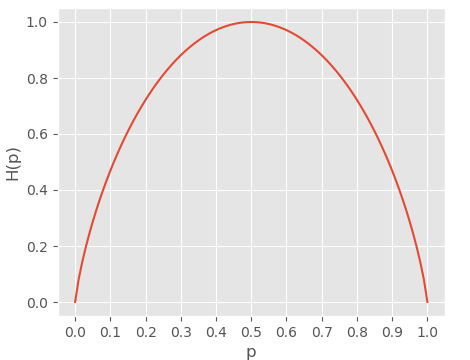  
当$p=0$或$p=1$时$H(p)=0$，即当随机变量全是0或者全是1时，完全没有不确定性；当$p=0.5$时$H(p)=1$，即当随机变量取各个值的概率都相等时，不确定性最大。

### 2.2 条件熵
设随机变量$(X,Y)$的联合概率分布为：$$P(X=x_{i},Y=y_{j})=p_{ij}，i=1,2,...,n；j=1,2,...,m$$  
则在随机变量$X$给定的条件下随机变量$Y$的**条件熵(conditional entropy)** 定义为：$$H(Y\,|\,X)=\sum_{i=1}^{n}p_{i}H(Y\,|\,X=x_{i})$$  
其中，$p_{i}=P(X=x_{i}),\,i=1,2,...,n$  
> **条件熵$H(Y\,|\,X)$表示在已知随机变量$X$的条件下随机变量$Y$的不确定性。**

### 2.3 信息增益
现在，知道了熵和条件熵后，就可以基于**信息增益(information gain)** 准则来选择最优的特征了。  
  
特征 $A$ 对数据集 $D$ 的信息增益 $g(D,A)$ 定义为：$$g(D,A)=H(D)-H(D\,|\,A)$$
$H(D)$ 表示数据集 $D$ 中的类别不确定性程度，$H(D\,|\,A)$ 表示在给定特征 $A$ 的条件下数据集 $D$ 的类别不确定性程度，它们的差则表示由于特征 $A$ 而使得数据集 $D$ 的类别不确定性减少的程度。一般情况下，不同的特征具有不同的信息增益，信息增益最大的特征就是应该选择的最优特征。  
  
设训练集为 $D$，$|\,D\,|$ 表示训练集中的样本个数，总共有 $K$ 个类 $C_{k},\,k=1,2,...,K$，$|\,C_{k}\,|$ 表示每个类别的样本个数，$\sum_{k=1}^{K}|\,C_{k}\,|=|\,D\,|$。设总共有 $M$ 个特征 $\{A_{1},A_{2},...,A_{M}\}$，对于其中某个特征 $A_{m}$，假设有 $n$ 个不同的取值 $\{a_{1},a_{2},...,a_{n}\}$，根据特征 $A_{m}$ 的取值将 $D$ 划分为 $n$ 个子集 $\{D_{1},D_{2},...,D_{n}\}$，$|\,D_{i}\,|$ 表示子集 $D_{i}$ 的样本个数，$\sum_{i=1}^{n}|\,D_{i}|=|\,D\,|$。设子集 $D_{i}$ 中属于类 $C_{k}$ 的样本集合为 $D_{ik}$，即 $D_{ik}=D_{i}\cap C_{k}$，$|\,D_{ik}\,|$ 表示 $D_{ik}$ 的样本个数。则选择最优特征的步骤如下：  
1. 计算训练集 $D$ 的熵 $H(D)$：$$H(D)=-\sum_{k=1}^{K}\frac{|\,C_{k}\,|}{|\,D\,|}log_{2}\frac{|\,C_{k}\,|}{|\,D\,|}$$
2. 计算特征 $A_{m}$ 对训练集 $D$ 的条件熵： $H(D\,|\,A_{m})$：$$H(D\,|\,A_{m})=\sum_{i=1}^{n}\frac{|\,D_{i}\,|}{|\,D\,|}H(D_{i})=-\sum_{i=1}^{n}\frac{|\,D_{i}\,|}{|\,D\,|}\sum_{k=1}^{K}\frac{|\,D_{ik}\,|}{|\,D_{i}\,|}log_{2}\frac{|\,D_{ik}\,|}{|\,D_{i}\,|}$$ 
3. 计算信息增益：$$g(D,A_{m})=H(D)-H(D\,|\,A_{m})$$ 
4. 重复步骤2和3，算出特征集中所有的特征对应的信息增益，最后选择信息增益最大的特征作为最优特征。